## Download code from github

In [1]:
!git clone https://github.com/kokheng1025/SelfDrivingCar.git

Cloning into 'SelfDrivingCar'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 53 (delta 5), reused 51 (delta 3), pack-reused 0
Unpacking objects: 100% (53/53), done.


In [2]:
cd SelfDrivingCar/CarND-Traffic-Sign-Classifier-Project/

/content/SelfDrivingCar/CarND-Traffic-Sign-Classifier-Project


In [3]:
!wget https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip

--2018-11-18 11:34:02--  https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip
Resolving d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)... 52.222.163.119, 52.222.163.14, 52.222.163.176, ...
Connecting to d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)|52.222.163.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123524425 (118M) [application/zip]
Saving to: ‘traffic-signs-data.zip’

traffic-signs-data. 100%[===================>] 117.80M  28.7MB/s    in 4.7s    

2018-11-18 11:34:08 (25.1 MB/s) - ‘traffic-signs-data.zip’ saved [123524425/123524425]



In [5]:
!unzip traffic-signs-data.zip

Archive:  traffic-signs-data.zip
  inflating: test.p                  
  inflating: train.p                 
  inflating: valid.p                 


##Step 0: Load The Data

In [0]:
# Load the picked data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./train.p"
validation_file = "./valid.p"
testing_file = "./test.p"

with open(training_file, mode='rb') as f:
  train = pickle.load(f)
with open(validation_file, mode='rb') as f:
  valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
  test = pickle.load(f)

x_train, y_train = train['features'], train['labels']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:


*   'features' is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
*   'labels' is a 1D array containing the label/class id of the traffic sign. The file signnames.csv contains id -> name mappings for each id.
*   'sizes' is a list containing tuples, (width, height) representing the original width and height the image.
*   'coords' is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the pandas shape method might be useful for calculating some of the summary results.![alt text](https://)

**Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas**

In [7]:
import numpy as np

# TODO: Number of validation examples
n_validation = x_valid.shape[0]

# TODO: Number of testing examples.
n_test = x_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = x_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("x_train shape", x_train.shape)
print("x_valid shape", x_valid.shape)
print("x_test shape", x_test.shape)

print("y_train shape", y_train.shape)
print("y_valid shape", y_valid.shape)
print("y_test shape", y_test.shape)

print("n_classes =", n_classes)

x_train shape (34799, 32, 32, 3)
x_valid shape (4410, 32, 32, 3)
x_test shape (12630, 32, 32, 3)
y_train shape (34799,)
y_valid shape (4410,)
y_test shape (12630,)
n_classes = 43


**Include an exploratory visualization of the dataset**

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The Matplotlib examples and gallery pages are a great resource for doing visualizations in Python.

NOTE: It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [0]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualization will be shown in the notebook
%matplotlib inline

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the classroom at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission.

There are various aspects to consider when thinking about this problem:

*  Neural network architecture (is the network over or underfitting?) 
*  Play around preprocessing techniques (normalization, rgb to grayscale, etc)
*  Number of examples per label (some have more than others).
*  Generate fake data.


Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**Pre-process the Data Set (normalization, grayscale, etc.)**

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, (pixel - 128)/ 128 is a quick way to approximately normalize the data and can be used in this project.

Other pre-processing steps are optional. You can try different techniques to see if it improves performance.

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.



In [0]:
import cv2

def processMean(dataImg):
  (R, G, B) = ([], [], [])
  for image in dataImg:
    (b, g, r) = cv2.mean(image)[:3]
    R.append(r)
    G.append(g)
    B.append(b)

  rMean = np.mean(R)
  bMean = np.mean(B)
  gMean = np.mean(G)
  
  return rMean, gMean, bMean

In [0]:
def preprocess(dataImg, normalize=False):
  data = []
    
  for image in dataImg:
    (B, G, R) = cv2.split(image.astype("float32"))
    if(normalize==True):
      R -= rMean
      G -= gMean
      B -= bMean
    img = cv2.merge([B, G, R])
    img = img.astype(float) / 255.0
    data.append(img)
  
  return np.array(data).reshape((-1,32,32,3)) 

In [0]:
import csv
def loadLabels():
  with open('signnames.csv', mode='r') as f:
    reader = csv.reader(f)
    next(reader) # skip the header
    signnames = {rows[0]: rows[1] for rows in reader}

  return signnames

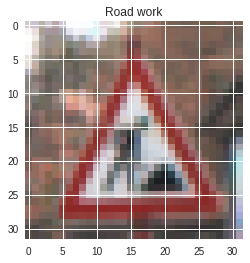

In [13]:
def showImg(dataImg, dataLabels):
  random = np.random.randint(len(dataImg))
  image = dataImg[random].squeeze()
  plt.figure()
  plt.imshow(image)
  signName = loadLabels()
  plt.title(signName[str(y_train[random])])  

showImg(x_train, y_train)

In [14]:
(rMean, gMean, bMean) = (0, 0, 0)
(rMean, gMean, bMean) = processMean(x_train)

print("rMean: ", rMean)
print("gMean: ", gMean)
print("bMean: ", bMean)

rMean:  81.83870445046912
gMean:  79.49594061049707
bMean:  86.69812205002299


In [0]:
x_train1 = preprocess(x_train, normalize=True)
x_valid1 = preprocess(x_valid, normalize=True)
x_test1 = preprocess(x_test, normalize=True)

In [18]:
print(x_train1.shape)

(34799, 32, 32, 3)


In [19]:
#shuffle the data
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

x_train1, y_train = shuffle(x_train1, y_train)
x_train1, x_validation1, y_train, y_validation = train_test_split(x_train1, y_train, test_size=0.2, random_state= 42)

print("x_train1.shape", x_train1.shape)
print("x_test1.shape", x_test1.shape)
print("x_validation.shape", x_validation1.shape)

x_train1.shape (27839, 32, 32, 3)
x_test1.shape (12630, 32, 32, 3)
x_validation.shape (6960, 32, 32, 3)


**Model Architecture**

In [0]:
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 128

In [0]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = n_classes.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [0]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [0]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=rate)
training_operation = optimizer.minimize(loss_operation)

In [0]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples    

In [0]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(x_train1)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        #x_train, y_train = shuffle(x_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = x_train1[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(x_validation1, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

In [35]:
print("Validation Accuracy = {:.3f}".format(validation_accuracy))

Validation Accuracy = 0.981


In [34]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(x_test1, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.903
